**Predicting Sales using TV, Radio, Newspaper and Linear Regression model**

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

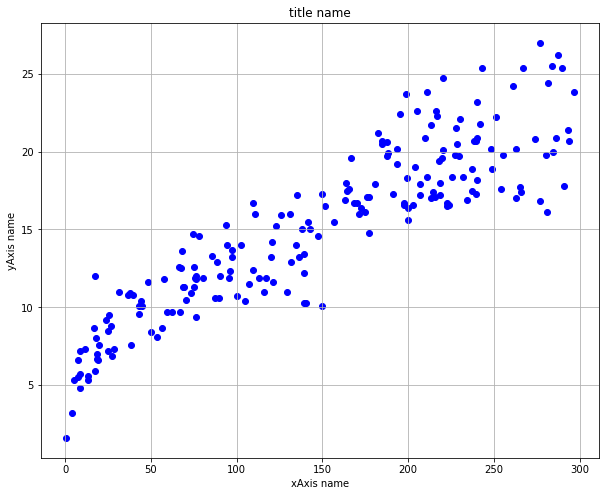

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(df.TV,df.Sales,color='blue')
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.grid(True)
plt.show()

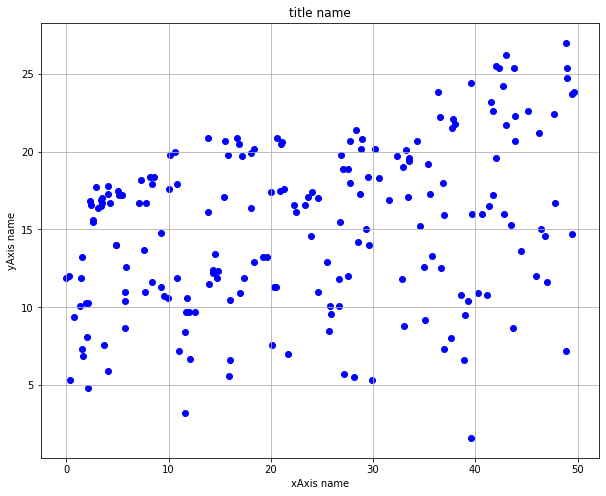

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(df.Radio,df.Sales,color='blue')
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.grid(True)
plt.show()

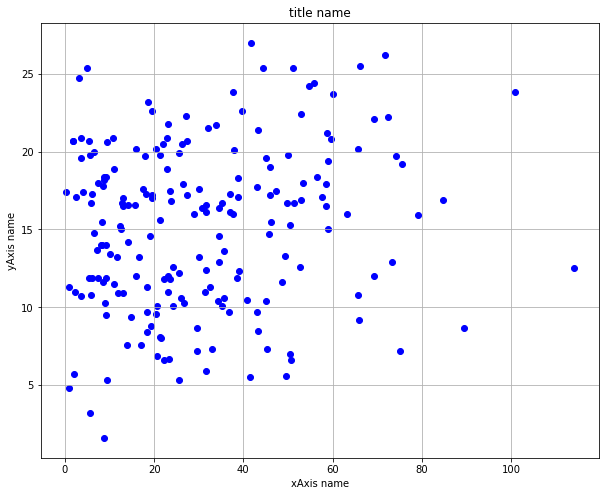

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(df.Newspaper,df.Sales,color='blue')
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.grid(True)
plt.show()

In [9]:
##Train Test split
from sklearn.model_selection import train_test_split
#X = df['TV'] # Independet variable
X = df.drop('Sales',axis=1) # Independet variables
y = df['Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [10]:
len(X_train),len(X_test)

(140, 60)

In [11]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# LR model
lm = LinearRegression()
lm.fit(X_train,y_train) #Fitting model
print(lm.score(X_train,y_train)) # Score is accuracy in which 1 is accurate

0.899374584012456


In [12]:
# Y=mX + b 
# m is coef
# b is intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.05502392  0.10251003 -0.00150711]
4.661439720130817


In [13]:
# Predicting the Salary for the Test values
y_pred = lm.predict(X_test)

In [14]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 2.3706599712256566
r square : 0.9071151423684273


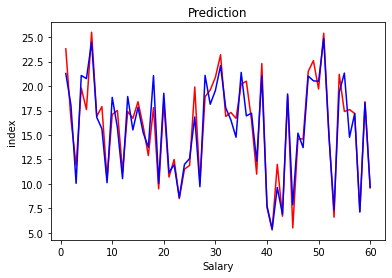

In [15]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

In [16]:
df[24:25] # To see the data in row

,TV,Radio,Newspaper,Sales
24,62.3,12.6,18.3,9.7


In [17]:
test_pass = np.array([62.3,12.6,18.3]).reshape(1,-1)     ## Change YearsExperience which is 3

print(lm.predict(test_pass)) #Predict Salary

[9.3534761]
